In [28]:
# Instalação silenciosa das bibliotecas necessárias
!pip install mplcyberpunk -q
!pip install yfinance -q


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [29]:
# Importando bibliotecas
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcyberpunk

In [30]:
# Definindo os tickers
tickers = ["^BVSP","^GSPC","BRL=X"]

In [31]:
# Baixando dados do mercado para os últimos 6 meses
dados_mercado = yf.download(tickers, period="6mo")["Adj Close"]
dados_mercado

[*********************100%***********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.000000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.000000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.000000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.000000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.000000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.000000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.000000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.000000,5408.419922


In [32]:
# Removendo valores nulos e renomeando colunas
dados_mercado.dropna(inplace=True)
dados_mercado.columns = ["DOLAR", "IBOVESPA", "S&P500"]
dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.0,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.0,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.0,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.0,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.0,5117.089844
...,...,...,...
2024-09-03 00:00:00+00:00,5.61510,134353.0,5528.930176
2024-09-04 00:00:00+00:00,5.64750,136111.0,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.0,5503.410156


In [33]:
# Configurando o estilo dos gráficos
plt.style.use("cyberpunk")


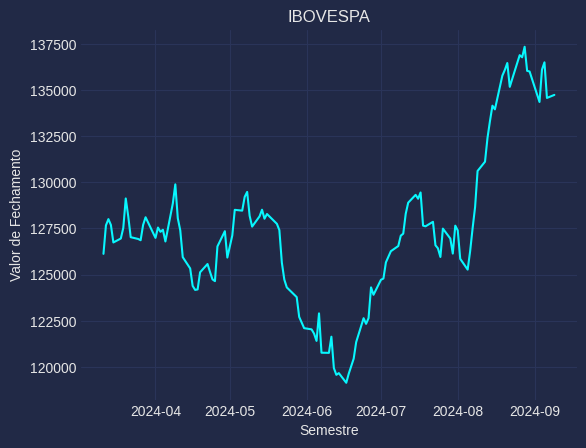

In [34]:
# Gerando gráficos para o ativo Índice da Bolsa de Valores de São Paulo (IBOVESPA)
plt.plot(dados_mercado["IBOVESPA"])
plt.title("IBOVESPA")
plt.xlabel("Semestre")
plt.ylabel("Valor de Fechamento")
plt.savefig("ibovespa.png")
plt.show()

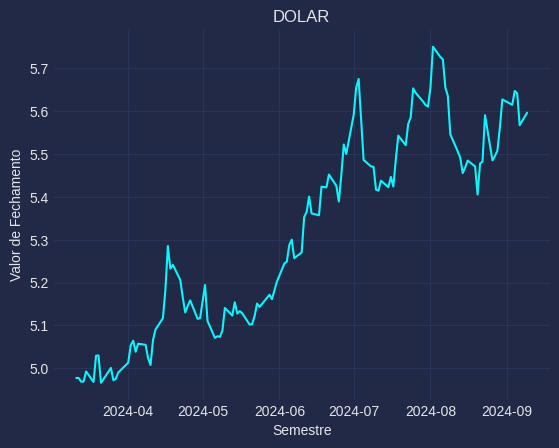

In [35]:
# Gerando gráficos para o ativo DOl
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR")
plt.xlabel("Semestre")
plt.ylabel("Valor de Fechamento")
plt.savefig("dolar.png")
plt.show()

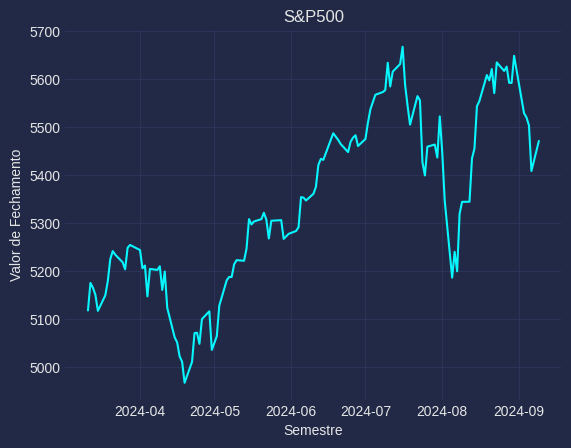

In [36]:
# Gerando gráficos para o ativo S&P500
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500")
plt.xlabel("Semestre")
plt.ylabel("Valor de Fechamento")
plt.savefig("sp500.png")
plt.show()

In [37]:
# Calculando os retornos diários
retornos_diarios = dados_mercado.pct_change()
retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,NaN,NaN,NaN
2024-03-12 00:00:00+00:00,-0.000028,0.012242,0.011202
2024-03-13 00:00:00+00:00,-0.001748,0.002647,-0.001925
2024-03-14 00:00:00+00:00,0.000101,-0.002469,-0.002871
2024-03-15 00:00:00+00:00,0.004729,-0.007424,-0.006483
...,...,...,...
2024-09-03 00:00:00+00:00,-0.002239,-0.012139,-0.021151
2024-09-04 00:00:00+00:00,0.005770,0.013085,-0.001603
2024-09-05 00:00:00+00:00,-0.000974,0.002873,-0.003018


In [38]:
# Calculando e formatando o retorno do último dia para cada ativo
retorno_dolar = retornos_diarios["DOLAR"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOVESPA"].iloc[-1]
retorno_sp = retornos_diarios["S&P500"].iloc[-1]

In [39]:
# Calculando e exibindo os retornos do dolar
retorno_dolar = str(round(retorno_dolar * 100, 2)) + "%"
retorno_dolar

'0.52%'

In [40]:
# Calculando e exibindo os retornos do Ibovespa
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + "%"
retorno_ibovespa

'0.12%'

In [41]:
# Calculando e exibindo os retornos do S&P500
retorno_sp = str(round(retorno_sp * 100, 2)) + "%"
retorno_sp

'1.16%'

In [42]:
# Importando Bibliotecas
import os
import smtplib
from email.message import EmailMessage

In [43]:
email = "alessandra.ovando85@gmail.com"

In [44]:
with open('senha.txt') as f:
    senha = f.readlines()
    f.close()
senha_email = senha[0]
senha_email

'xtxqdsczikuvsikp\n'

In [45]:
# Cria a mensagem
msg = EmailMessage()
msg['Subject'] = 'Panorama do Mercado Financeiro'
msg['From'] = 'coloqueoseu@email.com'
msg['To'] = 'email@email.com'
msg.set_content(f""" Prezado(a),

Gostaria de compartilhar com você um breve panorama do mercado financeiro dos principais índices globais, 
como o Ibovespa, o S&P 500 e o mercado de câmbio.

Retorno atual dos principais índices:
- IBOVESPA: {retorno_ibovespa}
- S&P500: {retorno_sp}
- DÓLAR: {retorno_dolar}

Em anexo, você encontrará três gráficos que ilustram os movimentos de mercado nos últimos 6 meses. 
Com uma visão clara das tendências atuais e podem servir como uma base sólida para tomadas de decisão estratégicas.

Se tiver qualquer dúvida ou gostaria de discutir mais detalhes sobre o cenário econômico atual, estou à disposição.

Atenciosamente,
 
""")

In [46]:
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [47]:
with open('sp500.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='sp500.png')

In [48]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')

In [49]:
# Envia o e-mail usando o servidor SMTP do Gmail
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, senha_email)
    smtp.send_message(msg)